In [3]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

print('imported!')

imported!


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(60000, 785)

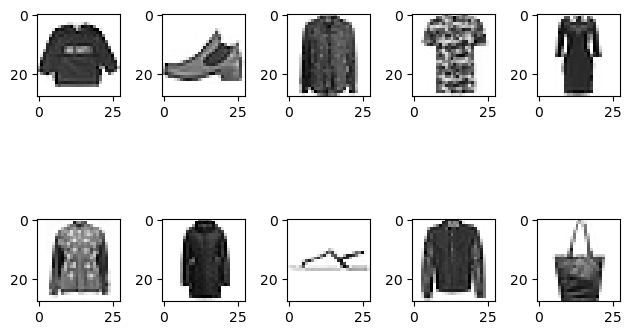

In [14]:
df = pd.read_csv('./data/fmnist/fashion-mnist_train.csv')
display(df.head(), df.shape) # (60000, 785)

img_data = df.drop('label', axis=1, inplace=False).values
fig = plt.figure()
fig_arr = []

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    
plt.tight_layout()
plt.show()

In [15]:
# 이 데이터를 이용해 머신러닝해보기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Prepareing Training Data Set
# 1. 학습 데이터와 테스트 데이터 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False).values,
                 df['label']. values,
                 test_size=0.2) # 8:2 비율

# 2. 정규화
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# 3. one-hot 처리는 스킵. keras를 이용

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 모델에 레이어 추가
# input layer
model.add(Flatten(input_shape=(784,))) # 28*28
# hidden layer
model.add(Dense(256, activation='relu')) # Hidden Layer의 activation은 relu로 잡는다. sigmoid로 잡으면 전파가 되지 않는다.
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax')) # 0~9

print(model.summary()) # 현재 레이어가 어떻게 구성되어 있는지 출력.
# Param은 w를 의미한다. 한 번 계산할 때마다 편미분이 필요하다. (Total params: 242,762)
# 많은 계산이 필요하게 되는 것이다.

# 모델 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy', # one-hot + crossentropy
              metrics=['accuracy']) # 평가 기준

# 모델 학습
model.fit(x_data_train_norm, # 우리 데이터가 간단하므로 크게 느려지지는 않을 것이다.
          t_data_train,
          epochs=50,
          validation_split=0.2,
          verbose=1,
          batch_size=100)
# val_accuracy: 0.8851
# 정확도가 높아지기는 했지만, 생각보다 상승 폭이 크지 않다. 과적합이 발생했을 가능성이 있다.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
384/384 [=======================

In [17]:
# 만든 모델에 대한 최종 평가
print(model.evaluate(x_data_test_norm, t_data_test)) # [0.35582849383354187, 0.8851666450500488]

375/375 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8879
[0.3240741789340973, 0.8879166841506958]


In [8]:
# === Dropout: 과적합 방지 ===

# Dropout: 과적합을 방지하기 위해 hidden layer의 몇 가지 노드를 비활성화.
# 복잡도를 낮춤.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 모델에 레이어 추가
# input layer
model.add(Flatten(input_shape=(784,))) # 28*28
# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25)) # hideen layer 사이에 Dropout을 추가한다
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax')) # 0~9

print(model.summary())

# 모델 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 평가 기준

# 모델 학습
model.fit(x_data_train_norm, # val_accuracy: 0.8982
          t_data_train,
          epochs=50,
          validation_split=0.2,
          verbose=1,
          batch_size=100)

# 0.88 -> 0.89

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)               

Epoch 49/50
384/384 [==============================] - 1s 4ms/step - loss: 0.2180 - accuracy: 0.9207 - val_loss: 0.3087 - val_accuracy: 0.8955
Epoch 50/50
384/384 [==============================] - 2s 4ms/step - loss: 0.2137 - accuracy: 0.9206 - val_loss: 0.3001 - val_accuracy: 0.8982


In [9]:
# 만든 모델에 대한 최종 평가
print(model.evaluate(x_data_test_norm, t_data_test)) # [0.2957453727722168, 0.8967499732971191]

375/375 [==============================] - 1s 2ms/step - loss: 0.2957 - accuracy: 0.8967
[0.2957453727722168, 0.8967499732971191]


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               200960    
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
384/384 [=======================

C:\Users\limo\AppData\Local\Temp\ipykernel_23608\1905431399.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


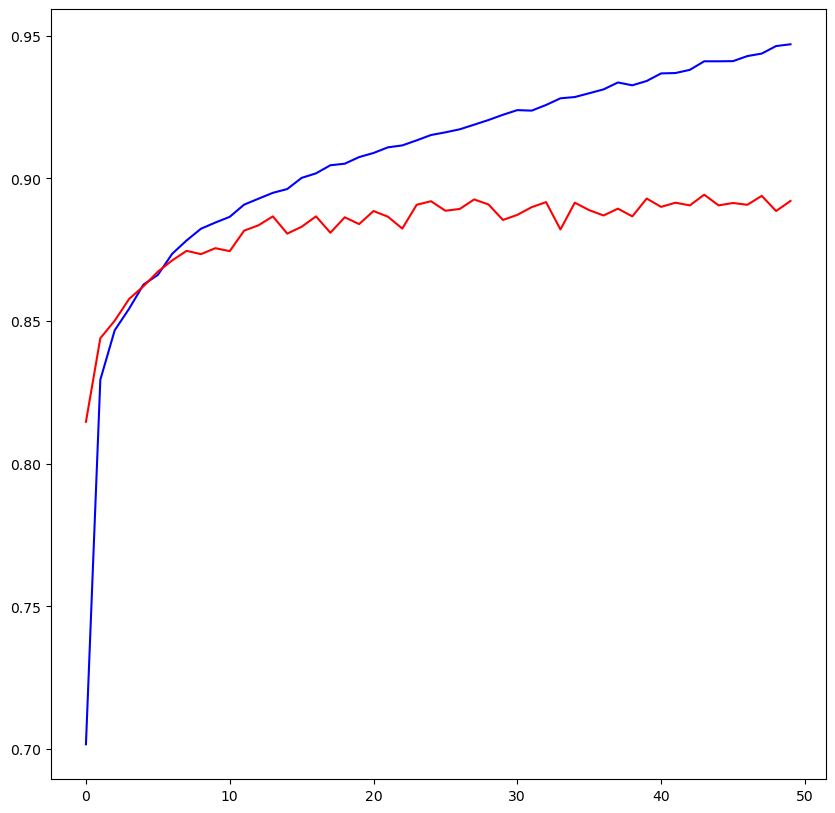

In [19]:
# === 학습 과정을 그래프로 그리기 ===

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 모델에 레이어 추가
# input layer
model.add(Flatten(input_shape=(784,)))
# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax')) # 0~9

print(model.summary()) # 현재 레이어가 어떻게 구성되어 있는지 출력.

# 모델 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy', # one-hot + crossentropy
              metrics=['accuracy']) # 평가 기준

# 모델 학습
history = model.fit(x_data_train_norm, # 별도의 변수를 잡으면 학습 진행 과정을 그래프로 그려볼 수 있다.
                    t_data_train,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1,
                    batch_size=100)

# 학습 과정을 그래프로 그려보기
fig = plt.figure(figsize=(10, 10)) # 그림 그릴 공간 생성. 크기 10*10
fig_acc = fig.add_subplot(1, 1, 1) # 공간의 내부 영역 생성 (1행 1열의 내부 공간 중 1번째 영역 = 즉 공간의 전체)

# epoch이 증가할 때 마다 나오는 accuracy, val_accuracy(평가된 정확도)를 그래프로 그린다
fig_acc.plot(history.history['accuracy'], color='b') # 학습 결과를 저장한 history 내에 history라는 속성이 있다.
fig_acc.plot(history.history['val_accuracy'], color='r')
fig.show()

# accuracy: 학습 데이터로 평가 후 학습 데이터로 평가
# val_accuracy: 학습 데이터로 평가 후 테스트 데이터로 평가
# 당연히 accuracy는 학습이 진행되면서 계속 높아질 수밖에 없다.
# val_accuracy는 학습이 진행되며 증가하다가 어느 순간 정체하게 된다.
#   즉, 이 시점부터 Overfitting이 발생했다는 것으로,
#   이 시점 이후에는 모델이 최적화되지 않기 시작하는 것이다.


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 256)               200960    
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
384/384 [======================

C:\Users\limo\AppData\Local\Temp\ipykernel_23608\1824787859.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


375/375 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8848
[0.3178851008415222, 0.8848333358764648]


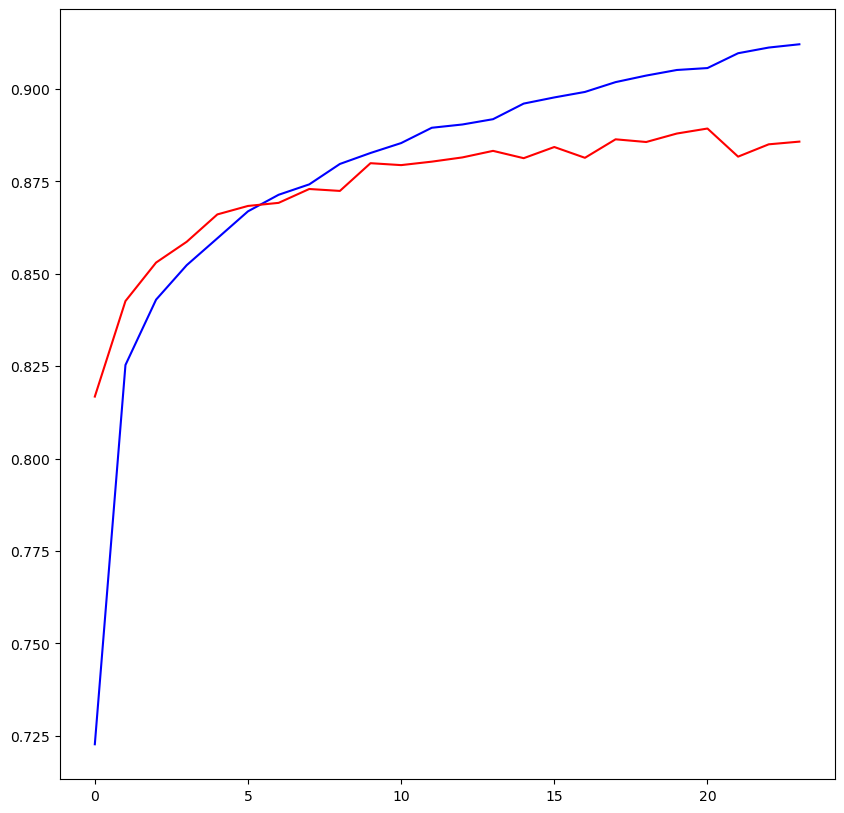

In [24]:
# === Keras의 Early Stopping ===

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 모델 생성
model = Sequential()

# 모델에 레이어 추가
# input layer
model.add(Flatten(input_shape=(784,)))
# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax')) # 0~9

print(model.summary()) # 현재 레이어가 어떻게 구성되어 있는지 출력.

# 모델 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy', # one-hot + crossentropy
              metrics=['accuracy']) # 평가 기준

# Keras의 Early Stopping 기능 이용
early_stopping = EarlyStopping(monitor='val_loss', # 학습이 점차 진행되는데 loss가 떨어지지 않는 경우를 조기 종료의 기준으로 지정
                               patience=3, # val_loss가 떨어지지 않는 경우가 3번 반복되면 학습 종료
                               mode='auto',
                               restore_best_weights=True, # 가장 좋았던 weights 값을 저장; 정확도가 좋아지지 않으면 이 값으로 대체
                               verbose=1)
# ^ 과적합 상태가 되면 loss가 떨어지지 않는다는 점을 이용

# 모델 학습
history = model.fit(x_data_train_norm, # 별도의 변수를 잡으면 학습 진행 과정을 그래프로 그려볼 수 있다.
                    t_data_train,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping], # Early Stopping 지정
                    batch_size=100)
# Epoch 24: early stopping
# early stopping이 작동하였다.

# 학습 과정을 그래프로 그려보기
fig = plt.figure(figsize=(10, 10))
fig_acc = fig.add_subplot(1, 1, 1)

# epoch이 증가할 때 마다 나오는 accuracy, val_accuracy(평가된 정확도)를 그래프로 그린다
fig_acc.plot(history.history['accuracy'], color='b') # 학습 결과를 저장한 history 내에 history라는 속성이 있다.
fig_acc.plot(history.history['val_accuracy'], color='r')
fig.show()

print(model.evaluate(x_data_test_norm, t_data_test)) # [0.3178851008415222, 0.8848333358764648]